In [54]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [55]:
dataframe = pd.read_csv(r"salida/prueba_medidas5.csv")
dataframe

,suma,distancias,mutual_info,m_earth,max_info_p,antonimos,CLASS
0,0.307372,39.145675,4.622286,0.037466,0.321673,0,entailment
1,0.164411,13.863624,0.984762,0.007264,0.423473,0,entailment
2,0.145214,21.441420,2.797228,0.027092,0.374040,0,contradiction
3,0.184051,5.690770,0.727185,0.010730,0.428242,0,contradiction
4,0.217909,12.320529,1.731026,0.016840,0.429542,0,neutral
...,...,...,...,...,...,...,...
95,0.331404,29.301110,3.374739,0.025939,0.474207,0,entailment
96,0.000000,4.414777,0.000000,0.000000,NaN,0,entailment
97,0.473885,20.708522,3.062808,0.027729,0.335611,0,contradiction
98,0.197156,14.175783,1.198357,0.005702,0.197156,0,contradiction


In [56]:
#dataframe.corr()

In [57]:
dataframe.describe()

,suma,distancias,mutual_info,m_earth,max_info_p,antonimos
count,100.000000,100.000000,100.000000,100.000000,78.000000,100.000000
mean,0.282839,15.471114,1.781882,0.017318,0.411387,0.090000
std,0.292599,10.387233,1.538257,0.015254,0.102573,0.287623
min,-0.021818,0.000000,0.000000,0.000000,0.177694,0.000000
25%,0.059380,6.147334,0.700058,0.005649,0.336424,0.000000
50%,0.213441,14.049280,1.393251,0.014229,0.427098,0.000000
75%,0.392348,23.153561,2.650642,0.026431,0.472342,0.000000
max,1.481318,45.452782,5.985706,0.062735,0.683210,1.000000


In [58]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


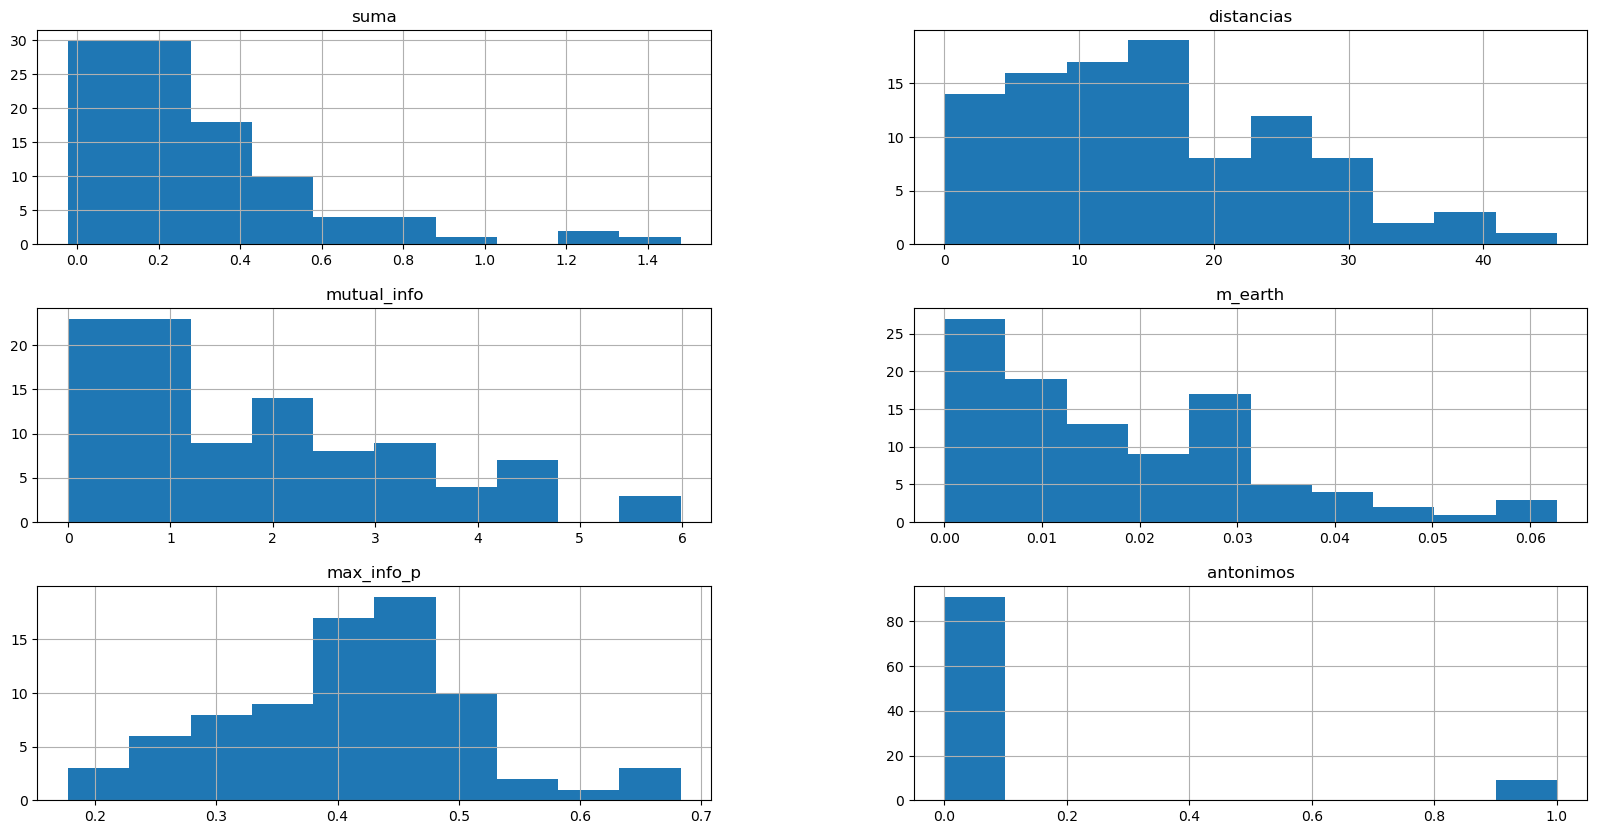

In [59]:
dataframe.hist(figsize=(20,10))
plt.show()

In [60]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [61]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [62]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

(100, 6)

In [63]:
X = np.nan_to_num(X)
X_test = np.nan_to_num(X_test)

In [64]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [65]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
model.decision_function(X)

array([[ 8.45054937e-01, -1.74399138e+00,  8.98936444e-01],
       [-3.17524884e-01,  3.77647986e-01, -6.01231017e-02],
       [ 1.37810048e-01, -3.76489824e-01,  2.38679777e-01],
       [-5.73085251e-01,  9.14649845e-01, -3.41564594e-01],
       [-2.61884040e-01,  3.49197875e-01, -8.73138348e-02],
       [-8.09165546e-02,  1.10485872e-01, -2.95693172e-02],
       [-3.50181814e-01,  4.61153850e-01, -1.10972036e-01],
       [-4.70128871e-01,  7.74589580e-01, -3.04460709e-01],
       [-1.06319866e-01, -1.53492931e-01,  2.59812797e-01],
       [-6.86626115e-01,  1.15431864e+00, -4.67692520e-01],
       [-5.32573041e-01,  8.80636105e-01, -3.48063064e-01],
       [ 2.83256099e-01, -6.72669898e-01,  3.89413799e-01],
       [-3.35894300e-01,  8.77754412e-01, -5.41860112e-01],
       [ 2.39436132e-01, -5.77877793e-01,  3.38441661e-01],
       [ 1.98857983e-01, -5.91277084e-01,  3.92419100e-01],
       [-5.53671249e-01,  8.76241555e-01, -3.22570305e-01],
       [-6.38102765e-01,  1.04406529e+00

In [67]:
labels=dataframe.columns[1:]

In [68]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [69]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [70]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  5 CLASS 0 distancias
Entailment  0 distancias 2 m_earth
Neutral  0 distancias 5 CLASS


In [71]:
n_columns=dataframe.shape[1]-1

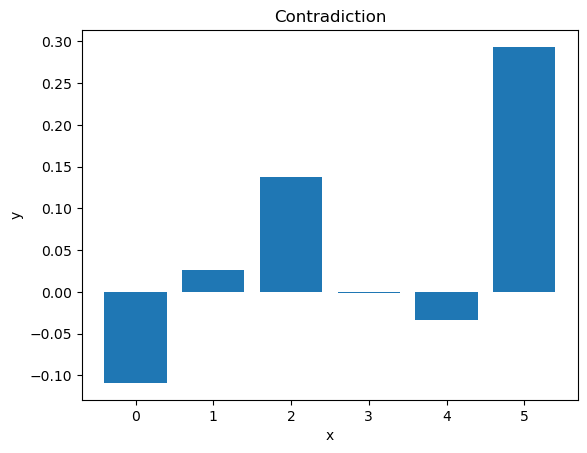

In [72]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

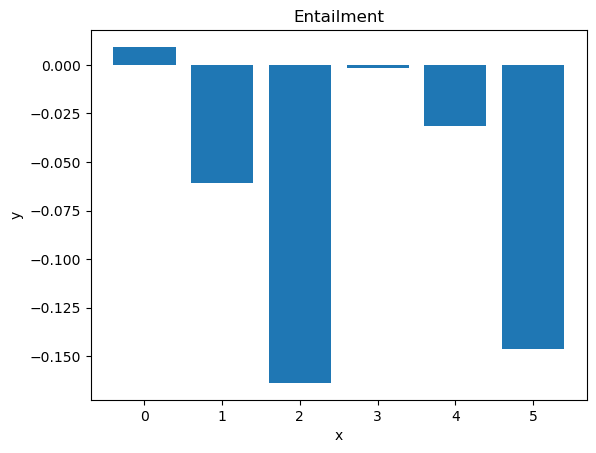

In [73]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

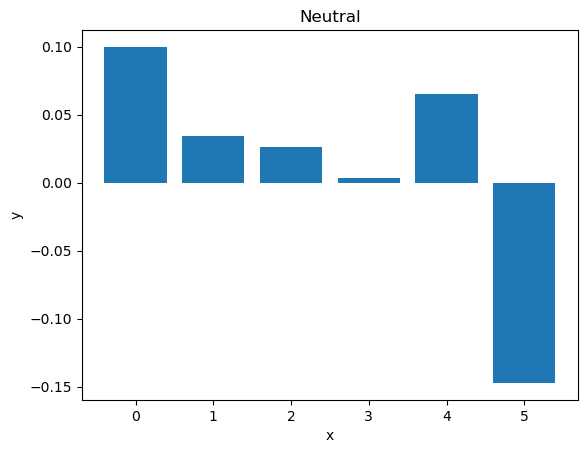

In [74]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [75]:
predictions = model.predict(X)
print(predictions)

['neutral' 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral' 'neutral'
 'neutral' 'contradiction' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'neutral' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'neutral'
 'contradiction' 'neutral' 'neutral' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entail

In [76]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [77]:
X

array([[ 3.07371900e-01,  3.91456752e+01,  4.62228616e+00,
         3.74655331e-02,  3.21672887e-01,  0.00000000e+00],
       [ 1.64411260e-01,  1.38636243e+01,  9.84761662e-01,
         7.26423414e-03,  4.23473477e-01,  0.00000000e+00],
       [ 1.45214260e-01,  2.14414196e+01,  2.79722849e+00,
         2.70920791e-02,  3.74039928e-01,  0.00000000e+00],
       [ 1.84050650e-01,  5.69076967e+00,  7.27184911e-01,
         1.07301825e-02,  4.28241879e-01,  0.00000000e+00],
       [ 2.17909460e-01,  1.23205285e+01,  1.73102637e+00,
         1.68397555e-02,  4.29541886e-01,  0.00000000e+00],
       [ 7.69879700e-02,  1.39227777e+01,  2.60389260e+00,
         2.47894046e-02,  3.50135386e-01,  0.00000000e+00],
       [ 1.98270720e-01,  1.24839091e+01,  1.01078420e+00,
         5.31489247e-03,  2.98925549e-01,  0.00000000e+00],
       [ 8.12321750e-02,  6.54863358e+00,  1.24546102e+00,
         6.79689814e-03,  5.02530396e-01,  0.00000000e+00],
       [ 2.93091060e-01,  2.30734215e+01,  8.339

In [78]:
model.score(X,y)

0.52

In [79]:
print(confusion_matrix(y, predictions))

[[ 4 12 11]
 [ 1 33  8]
 [ 1 15 15]]


In [80]:
print(f1_score(y,predictions, average=None))

[0.24242424 0.64705882 0.46153846]


In [81]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [82]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.525000 (0.222205)


In [83]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5


In [84]:
print(confusion_matrix(Y_validation, predictions))

[[ 0  3  3]
 [ 0 10  2]
 [ 0  2  0]]


In [85]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         6
   entailment       0.67      0.83      0.74        12
      neutral       0.00      0.00      0.00         2

     accuracy                           0.50        20
    macro avg       0.22      0.28      0.25        20
 weighted avg       0.40      0.50      0.44        20



/home/david/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#X_new = pd.DataFrame()
#model.predict(X_new)